In [1]:
#import pandas library for data processing operations I/O in CSV file
import pandas as pd
#import KMeans() for K-Means Clustering algorithm 
from sklearn.cluster import KMeans
#import MinMaxScaler for scaling/preprocessing of dataset
from sklearn.preprocessing import MinMaxScaler
#import matplotlib for data visualization and graphical plotting
import matplotlib.pyplot as plt
#import seaborn for data visualization for statistical graphics plotting
import seaborn as sns

In [2]:
#store dataset
dataset = pd.read_csv('income.csv')

In [3]:
print('Shape of the dataset is : ', dataset.shape, '\n')
print(dataset.head())


Shape of the dataset is :  (22, 3) 

      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000


In [4]:
dataset.tail()

,Name,Age,Income($)
17,Priyanka,41,63000
18,Nick,43,64000
19,Alia,39,80000
20,Sid,41,82000
21,Abdul,39,58000


In [5]:
#Statistics of the dataset
dataset.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


Text(0, 0.5, 'Income($)')

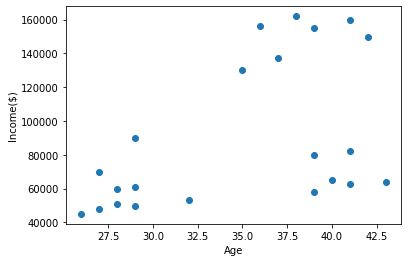

In [6]:
#Visualization of the data points (Income vs Age)
plt.scatter(dataset.Age, dataset['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [7]:
# Elbow Plot for Dataset without pre-processing

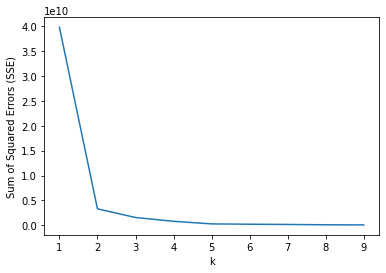

In [8]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dataset[['Age', 'Income($)']])
    sse.append(kmeans.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(k_rng, sse)

In [9]:
# Conclusion from above plot : k = 2 is the best fit for clustering the given dataset (w/o modification to the data)
kmeans = KMeans(n_clusters = 2)
y_predicted = kmeans.fit_predict(dataset[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
#Add a column of cluster number for each data point 
dataset['clusters'] = y_predicted
dataset.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
#Centroids of given cluster 

kmeans.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

In [12]:
#Forming separate cluster dataframes

dt0 = dataset[dataset.clusters==0]
dt1 = dataset[dataset.clusters==1]
print(dt0.head(),'\n')
print(dt1.head())

       Name  Age  Income($)  clusters
0       Rob   27      70000         0
1   Michael   29      90000         0
2     Mohan   29      61000         0
3    Ismail   28      60000         0
11      Tom   26      45000         0 

     Name  Age  Income($)  clusters
4    Kory   42     150000         1
5  Gautam   39     155000         1
6   David   41     160000         1
7  Andrea   38     162000         1
8    Brad   36     156000         1


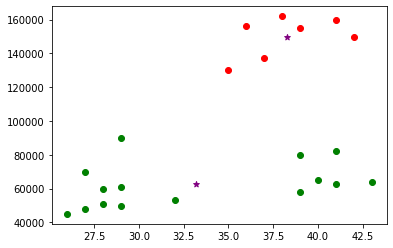

In [13]:
# Visaualization of clustered data (k=2)
plt.scatter(dt0.Age, dt0['Income($)'], color='green')
plt.scatter(dt1.Age, dt1['Income($)'], color='red')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = '*')

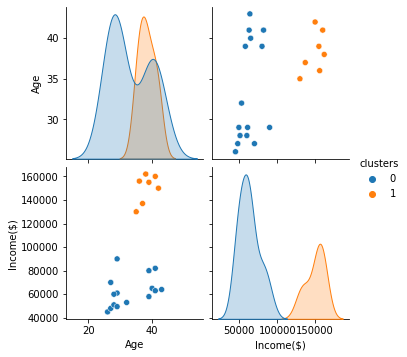

In [14]:
# Income visualization for k=2

a=sns.pairplot(dataset, hue='clusters')
plt.show()

[[3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]]


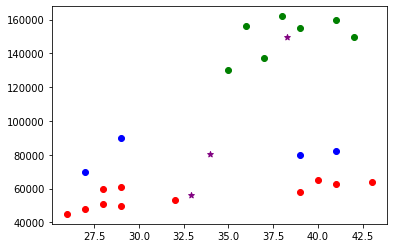

In [15]:
# We know that this is not the optimum number of clusters for k=3 (trivial clusters) on this dataset

km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(dataset[['Age', 'Income($)']])
dataset['clusters'] = y_predicted
print(km.cluster_centers_)

dt0 = dataset[dataset.clusters==0]
dt1 = dataset[dataset.clusters==1]
dt2 = dataset[dataset.clusters==2]

plt.scatter(dt0.Age, dt0['Income($)'], color='green')
plt.scatter(dt1.Age, dt1['Income($)'], color='red')
plt.scatter(dt2.Age, dt2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

# Visaualization of clustered data (k=3)

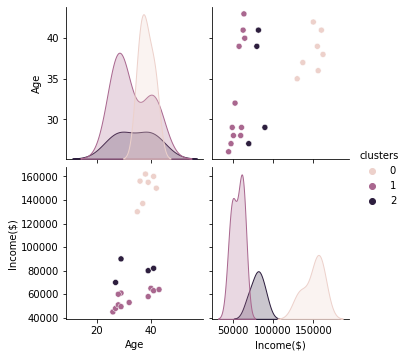

In [16]:
# Income visualization for k=3

a=sns.pairplot(dataset, hue='clusters')
plt.show()

[[0.85294118 0.2022792 ]
 [0.1372549  0.11633428]
 [0.72268908 0.8974359 ]]


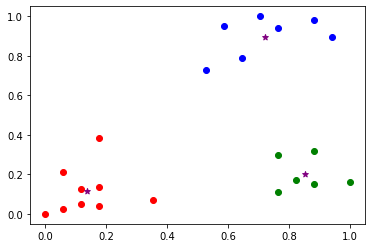

In [17]:
# We now perform preprocessing (scaling) of dataset to make uniform and then use k from Elbow Plot

scaler = MinMaxScaler()
scaler.fit(dataset[['Income($)']])
dataset[['Income($)']] = scaler.transform(dataset[['Income($)']])

scaler.fit(dataset[['Age']])
dataset[['Age']] = scaler.transform(dataset[['Age']])

km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(dataset[['Age', 'Income($)']])
dataset['clusters'] = y_predicted
print(km.cluster_centers_)

dt0 = dataset[dataset.clusters==0]
dt1 = dataset[dataset.clusters==1]
dt2 = dataset[dataset.clusters==2]

plt.scatter(dt0.Age, dt0['Income($)'], color='green')
plt.scatter(dt1.Age, dt1['Income($)'], color='red')
plt.scatter(dt2.Age, dt2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '*', label = 'centroid')

# Visaualization of clustered data (k=3) (after scaling)

In [18]:
dataset.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


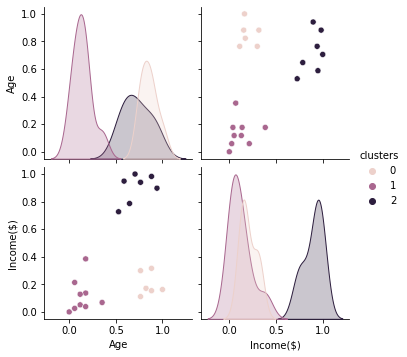

In [19]:
# Income visualization for k=3 (scaled data)

a=sns.pairplot(dataset, hue='clusters')
plt.show()

In [20]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(dataset[['Age', 'Income($)']])
    sse.append(km.inertia_)

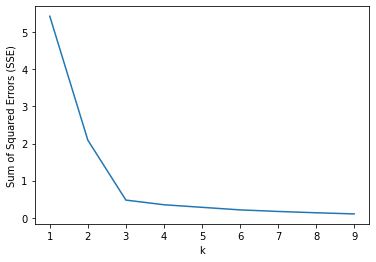

In [22]:
# Elbow Plot (scaled data)

plt.xlabel('k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.plot(k_range, sse)